In [1]:
#import modules
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import integrate

$S$ - Susceptible humans\
$E$ - Exposed humans (infected but not infectious and show no sign of disease)\
$A$ - Asymptomatically-infectious humans (undetected)\
$I$ - Symptomatically-infectious humans (undetected)\
$I_D$ - Detected infectious humans (asymptomatic and symptomatic) via testing R Recovered humans\
$\beta$ - Effective transmission rate\
$\sigma$ - Progression rate from exposed state to infectious state\
$\nu$ - Fraction of new infectious humans that are asymptomatic\
$\alpha$ - Modification parameter that accounts for the reduced infectiousness of humans in the A class when compared to humans in the I class\
$\gamma_a, \gamma_o, \gamma_i$ - Recovery rates for individuals in the $A, I$ and $I_D$ classes, respectively \
$\psi$ - detection rate (via contact tracing and testing) for the $I$ class\
$\theta$ - detection rate (via contact tracing and testing) for the $A$ class \
$d_0, d_D$ - Disease induced death rates for individuals in the $I$ and $I_D$ classes, respectively 

In [10]:
#define parameters
beta = 0.4236
sigma = 1/5.2
nu = 0.5
alpha = 0.5
gamma_a = 0.13978
gamma_o = 0.13978
gamma_i = 1/15
psi = 0.0135
theta = 1.8999*10**(-12)
d_o = 0.015
d_d = 0.015


def disease(x, t):
    '''returs the derivative of S(t), E(t), A(t), I(t), I_D(t), R(t)'''
    S = x[0]
    E = x[1]
    A = x[2]
    I = x[3]
    I_D = x[4]
    R = x[5]
    
    dSdt = -beta*(alpha*A+I)*S/(S+E+A+I+R)
    dEdt = beta*(alpha*A+I)*S/(S+E+A+I+R) - sigma*E
    dAdt = nu*sigma*E - (theta+gamma_a)*A
    dIdt = (1-nu)*sigma*E-(psi+gamma_o+d_o)*I
    dI_Ddt = theta*A + psi*I - (gamma_i+d_d)*I_D
    dRdt = gamma_i*I_D + gamma_a*A + gamma_o*I
    
    return [dSdt, dEdt, dAdt, dIdt, dI_Ddt,dRdt]

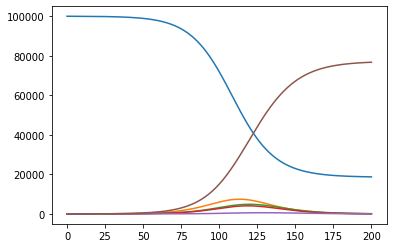

In [13]:
#give initial conditions for x = [S,E,A,I,I_D,R]
x0 = [100000,0,0,10,0,0]
#period of time of interest
t = np.linspace(0,200,100000)

#solve system of differential equations
x = odeint(disease,x0,t)

#assign the values from x
S = x[:,0]
E = x[:,1]
A = x[:,2]
I = x[:,3]
I_D = x[:,4]
R = x[:,5]

#plot the evolution of each of the states
plt.plot(t,S)
plt.plot(t,E)
plt.plot(t,A)
plt.plot(t,I)
plt.plot(t,I_D)
plt.plot(t,R)
plt.show()

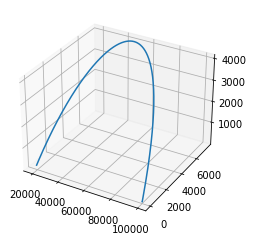

In [7]:
#3d plot on three of S,E,A,I,I_D,R
ax=plt.axes(projection='3d')
ax.plot3D(S, E, I)
plt.show()